In [1]:
from cf import CF
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


items = [
    'a', 'ag', 'al', 'au', 'b', 'bb', 'bu', 'c', 'cf', 'cu', 'fb', 'fg', 'fu', 'i', 'j', 'jd', 
    'jm', 'jr', 'l', 'm', 'oi', 'p', 'pb', 'pm', 'rb', 'ri', 'rm', 'rs', 'ru', 'sr', 'ta', 'v', 
    'wh', 'wr', 'y', 'zn', 'fund'
]

item2name = {
    'a': '豆一', 'ag': '沪银', 'al': '沪铝', 'au': '沪金', 'b': '豆二', 'bb': '胶合板', 'bu': '沥青', 'c': '玉米', 'cf': '郑棉', 
    'cu': '沪铜', 'fb': '纤维板', 'fg': '玻璃', 'fu': '燃油', 'i': '铁矿石', 'j': '焦炭', 'jd': '鸡蛋', 'jm': '焦煤', 'jr': '粳稻', 
    'l': '塑料', 'm': '豆粕', 'oi': '菜油', 'p': '棕榈油', 'pb': '沪铅', 'pm': '普麦', 'rb': '螺纹钢', 'ri': '早籼稻', 'rm': '菜粕', 
    'rs': '菜籽', 'ru': '橡胶', 'sr': '白糖', 'ta': 'PTA', 'v': 'PVC', 'wh': '强麦', 'wr': '线材', 'y': '豆油', 'zn': '沪锌', 'fund': 'fund'
}


I,J,K = 6,6,4
M,N = 37,36

/home/lizimeng/python/lib/python3.6/site-packages/IPython/nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated since IPython 4.0. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)


In [2]:
cf = CF('../merge/whole_month.data', ['log10'])
res = cf.tucker([I,J,K], [3.,3.,3.,3.])
print (res.RRMSE)
print (res.sparseness)

Starting MATLAB on ZMQ socket ipc:///tmp/pymatbridge-ffb7feb2-1e92-41b6-8c85-b340e8520a56
Send 'exit' command to kill the server
...MATLAB started and connected!
MATLAB closed
0.295994618571
(0.49638002154145067, 0.52413788002770978, 0.35786447536538479, 0.45039968934260988)


# 时间模式

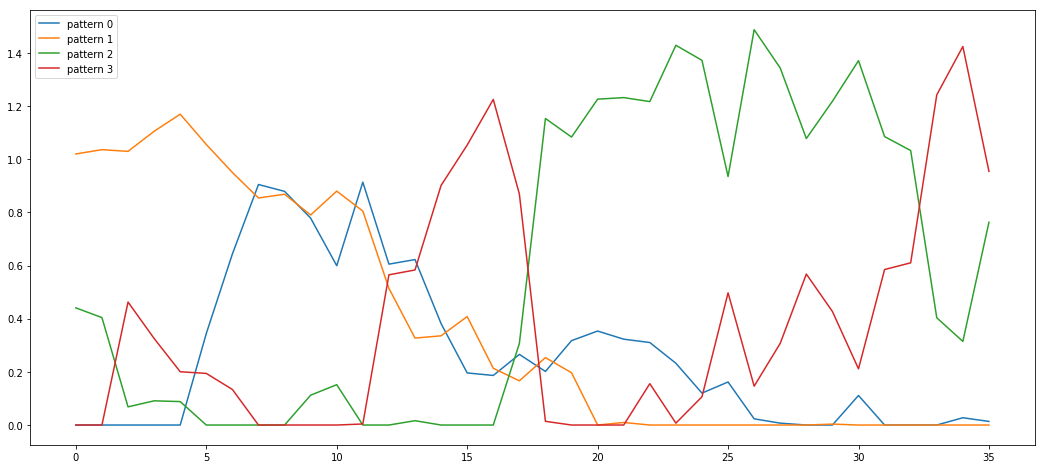

In [3]:
res.T_analysis()

# 源模式

## 按行确定模式

In [4]:
res.O_analysis(how='row')

[['豆一',
  '沪银',
  '沪铝',
  '沪金',
  '郑棉',
  '沪铜',
  '玻璃',
  '铁矿石',
  '焦炭',
  '鸡蛋',
  '焦煤',
  '塑料',
  '菜油',
  '棕榈油',
  '螺纹钢',
  '菜粕',
  '橡胶',
  '白糖',
  'PTA',
  '线材',
  '豆油'],
 ['豆二', '胶合板', '纤维板', '粳稻', '早籼稻'],
 ['fund'],
 ['玉米', '豆粕', '普麦', '菜籽', '强麦'],
 ['燃油', '沪铅', '沪锌'],
 ['沥青', 'PVC']]

## 按列确定模式

In [5]:
res.O_analysis(how='col')

[['沪金', '郑棉', '沪铜', '铁矿石', '焦炭'],
 ['胶合板', '纤维板', '强麦', '早籼稻', 'PVC'],
 ['fund', '螺纹钢', '豆粕', '白糖', '鸡蛋'],
 ['强麦', '玉米', '豆粕', '豆一', '白糖'],
 ['沪铅', '沪锌', '沪铝', '沪银', '螺纹钢'],
 ['沥青', 'PVC', '塑料', '焦煤', '橡胶']]

# 目的模式

## 按“每种商品从属度最大”确定模式

In [6]:
res.D_analysis(how='row')

[['豆一',
  '沪银',
  '沪铝',
  '沪金',
  '玉米',
  '郑棉',
  '沪铜',
  '玻璃',
  '铁矿石',
  '焦炭',
  '鸡蛋',
  '焦煤',
  '塑料',
  '豆粕',
  '菜油',
  '棕榈油',
  '螺纹钢',
  '菜粕',
  '橡胶',
  '白糖',
  'PTA',
  '线材',
  '豆油'],
 ['fund'],
 ['豆二', '胶合板', '纤维板', '粳稻', '早籼稻'],
 ['燃油', '沪铅', '沪锌'],
 ['普麦', '菜籽', '强麦'],
 ['沥青', 'PVC']]

## 按“每个模式从属度前K大”确定模式

In [7]:
res.D_analysis(how='col')

[['郑棉', '沪金', '沪铜', '铁矿石', '豆一'],
 ['fund', '螺纹钢', '豆粕', '鸡蛋', '橡胶'],
 ['胶合板', '纤维板', '强麦', 'PVC', '早籼稻'],
 ['沪铅', '沪锌', '沪铝', '沪银', '螺纹钢'],
 ['强麦', '玉米', '豆粕', '豆一', '鸡蛋'],
 ['沥青', 'PVC', '焦炭', '塑料', '焦煤']]